In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from datetime import date
import quantstats as qs
qs.extend_pandas()

### List of key market dates
#### Bear <br>
2020-02-10 - 2020-03-16 <br>
2007-10-01 - 2009-03-02 <br>
2000-03-13 - 2002-10-30 <br>
1987-08-17 - 1987-11-30 <br>
1980-11-17 - 1982-08-09 <br>
1973-01-02 - 1974-09-30 <br>
1968-12-09 - 1970-05-18 <br>
1966-01-31 - 1966-10-03 <br>
1961-12-04 - 1962-10-22 <br>
1957-07-15 - 1957-12-23 <br>
1937-02-22 - 1942-04-20 <br>
1929-02-09 - 1932-07-05 <br>

#### Bull <br>
1935-03-11 - 1937-02-22 <br>
1942-04-20 - 1957-07-15 <br>
1960-10-24 - 1961-12-04 <br>
1962-10-22 - 1966-01-31 <br>
1966-10-03 - 1968-12-09 <br>
1970-05-18 - 1973-01-02 <br>
1978-03-27 - 1980-11-17 <br>
1982-08-09 - 1987-08-17 <br>
1990-10-15 - 2000-03-13 <br>
2002-10-30 - 2007-10-01 <br>
2009-03-02 - 2020-02-10 <br>
2020-03-20 - 2021-12-20 <br>



## Settings

In [15]:
# Settings
local_data = [True, False][0]
all_local = [True, False][1]
max_sharpe = [True, False][0]
min_variance = [True, False][0]
target_vol = [True, False][0]
manual_weights  = [True, False][1]
plot_timeseries = [True, False][0]
l2_reg = [True, False][0]
semi_var = [True, False][0]
c_VAR = [True, False][0]
stock = "BZ=F ZN=F GC=F SI=F IYR LQD EEM ^N225 ^N100" #"BZ=F NQ=F ZN=F GC=F SI=F ZT=F ZB=F ES=F IYR EWJ LQD EEM ^N225 ^N100"
fund_folder = r'\fund_series\20220207'
prefix_name = 'yhoo_asset_classes'
train_start = '01/08/2018'
train_end = '07/14/2019'
test_start = '07/15/2019'
test_end = date.today()


# Mean-variance optimization

In [16]:
def generate_performance_metrics (prices_pivot = None, prefix_name = None, file_text = None, benchmark = 'SPY', title = 'Strategy Tearsheet', weights = None):
    returns = np.log(prices_pivot/prices_pivot.shift(1))
    agg_returns = returns * weights
    portfolio_return = agg_returns.sum(axis=1)
    portfolio_return.name = 'Close'
    portfolio_return.index = pd.to_datetime(portfolio_return.index)
    qs.reports.html(returns = portfolio_return, benchmark = benchmark, output = prefix_name + file_text + '.html', title= prefix_name+ title)

## Downloading data

In [17]:
import yfinance as yf
today = date.today()

In [18]:
if local_data == False:
    date_start = '2000-01-01'
    date_end = today.strftime("%Y-%m-%d")
    time_interval = ['daily', 'weekly','monthly'][0]
    data = yf.download(stock, start=date_start, end=date_end)
    data_close = data['Adj Close']
    concatenated_df_pivot = data_close
    concatenated_df_pivot = concatenated_df_pivot.sort_values(by="Date", key=pd.to_datetime)
    concatenated_df_pivot = concatenated_df_pivot.dropna()
    if plot_timeseries:
        data_close.plot(logy= True, figsize=(30,15))



In [19]:
# ALL FILES
path = r'C:\Users\Ferhat\Python Code\Github\Portfolio_Optimisation\PortfolioOptimisation' + fund_folder                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
iterator = zip(np.arange(len(all_files)).tolist(), all_files)
file_list = dict(iterator)
file_list


{0: 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\20220207\\HgCapital Trust Ord.csv',
 1: 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\20220207\\JPM Global Macro Opportunities C Net Inc.csv',
 2: 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\20220207\\JPMorgan China Growth & Income Ord.csv',
 3: 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\20220207\\Montanaro European Smaller Ord.csv',
 4: 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\20220207\\PIMCO GIS Glb Bd Instl GBPH Acc.csv',
 5: 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\20220207\\Rathbone Global Opportunities S Acc.csv',
 6: 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioO

C:\Users\Ferhat\Python Code\Github\Portfolio_Optimisation\PortfolioOptimisation\fund_series\20220207\HgCapital Trust Ord.csv
C:\Users\Ferhat\Python Code\Github\Portfolio_Optimisation\PortfolioOptimisation\fund_series\20220207\JPMorgan China Growth & Income Ord.csv
C:\Users\Ferhat\Python Code\Github\Portfolio_Optimisation\PortfolioOptimisation\fund_series\20220207\Montanaro European Smaller Ord.csv
C:\Users\Ferhat\Python Code\Github\Portfolio_Optimisation\PortfolioOptimisation\fund_series\20220207\PIMCO GIS Glb Bd Instl GBPH Acc.csv
C:\Users\Ferhat\Python Code\Github\Portfolio_Optimisation\PortfolioOptimisation\fund_series\20220207\Rathbone Global Opportunities S Acc.csv
C:\Users\Ferhat\Python Code\Github\Portfolio_Optimisation\PortfolioOptimisation\fund_series\20220207\Scottish Mortgage Ord.csv


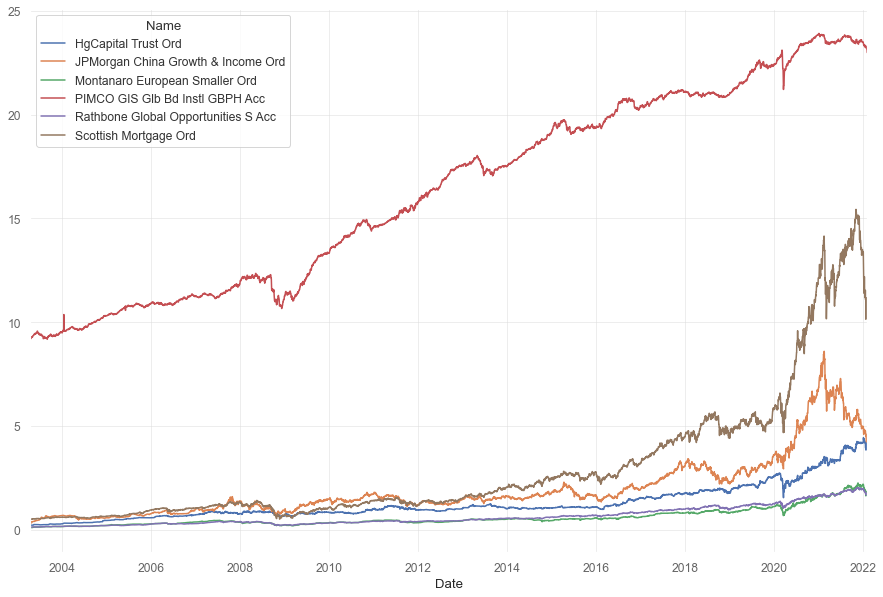

In [20]:
# SOME FILES
if local_data:
    indices = [0, 2, 3, 4, 5, 6]
    sub_files = []

    for index in indices:
        sub_files.append(file_list[index])

    df_from_each_file = (pd.read_csv(f, index_col=False) for f in sub_files)
    concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)
    
    for x in range(len(sub_files)):
        print(sub_files[x])
    concatenated_df.drop([ 'High', 'Low', 'Open', 'Volume'], axis=1, inplace=True)
    concatenated_df['Close'] = concatenated_df['Close'].fillna(concatenated_df['NAV'])
    concatenated_df.drop(['NAV'], axis=1, inplace=True)
    concatenated_df_pivot = concatenated_df.pivot(columns='Name', values='Close', index='Date')
    concatenated_df_pivot.index = pd.to_datetime(concatenated_df_pivot.index, format = '%m/%d/%Y')#.strftime('%m/%d/%Y')
    #concatenated_df_pivot['Date']= pd.to_datetime(concatenated_df_pivot['Date'])
    concatenated_df_pivot = concatenated_df_pivot.sort_values(by="Date", key=pd.to_datetime)
    concatenated_df_pivot = concatenated_df_pivot.dropna()

    if plot_timeseries:
        concatenated_df_pivot.plot(figsize=(15,10))

In [21]:
concatenated_df_pivot

Name,HgCapital Trust Ord,JPMorgan China Growth & Income Ord,Montanaro European Smaller Ord,PIMCO GIS Glb Bd Instl GBPH Acc,Rathbone Global Opportunities S Acc,Scottish Mortgage Ord
Date,,,,,,
2003-04-16,0.2205,0.410,0.1095,9.21,0.136142,0.512
2003-04-17,0.2205,0.405,0.1094,9.21,0.134755,0.511
2003-04-18,0.2205,0.405,0.1094,9.21,0.134755,0.511
2003-04-19,0.2205,0.405,0.1094,9.21,0.134755,0.511
2003-04-20,0.2205,0.405,0.1094,9.21,0.134755,0.511
...,...,...,...,...,...,...
2022-01-31,4.1800,4.410,1.7300,23.20,1.725353,10.790
2022-02-01,4.2600,4.590,1.8140,23.18,1.762637,11.175
2022-02-02,4.2750,4.490,1.8620,23.19,1.772133,11.055


## Split the data

In [22]:
train_df = concatenated_df_pivot.loc[train_start:train_end]
train_df

Name,HgCapital Trust Ord,JPMorgan China Growth & Income Ord,Montanaro European Smaller Ord,PIMCO GIS Glb Bd Instl GBPH Acc,Rathbone Global Opportunities S Acc,Scottish Mortgage Ord
Date,,,,,,
2018-01-08,1.790,3.20,0.8175,21.12,1.024579,4.664
2018-01-09,1.795,3.20,0.8200,21.08,1.029313,4.702
2018-01-10,1.780,3.28,0.8300,21.07,1.028405,4.680
2018-01-11,1.785,3.27,0.8300,21.07,1.029313,4.682
2018-01-12,1.785,3.28,0.8300,21.08,1.025105,4.680
...,...,...,...,...,...,...
2019-07-10,2.180,2.88,1.1050,22.09,1.251462,5.585
2019-07-11,2.180,2.88,1.1125,22.06,1.251958,5.570
2019-07-12,2.200,2.88,1.1050,22.05,1.258306,5.505


In [23]:
test_df = concatenated_df_pivot.loc[test_start:test_end]
test_df

Name,HgCapital Trust Ord,JPMorgan China Growth & Income Ord,Montanaro European Smaller Ord,PIMCO GIS Glb Bd Instl GBPH Acc,Rathbone Global Opportunities S Acc,Scottish Mortgage Ord
Date,,,,,,
2019-07-15,2.180,2.880,1.1100,22.08,1.260435,5.535
2019-07-16,2.180,2.915,1.1050,22.07,1.274223,5.615
2019-07-17,2.190,2.905,1.1025,22.11,1.271670,5.560
2019-07-18,2.180,2.875,1.0975,22.14,1.261862,5.475
2019-07-19,2.185,2.885,1.0950,22.15,1.260793,5.485
...,...,...,...,...,...,...
2022-01-31,4.180,4.410,1.7300,23.20,1.725353,10.790
2022-02-01,4.260,4.590,1.8140,23.18,1.762637,11.175
2022-02-02,4.275,4.490,1.8620,23.19,1.772133,11.055


## Calculating the covariance matrix

In [24]:
import pypfopt
pypfopt.__version__

'1.5.1'

In [25]:
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(train_df, frequency=252)
sample_cov

Name,HgCapital Trust Ord,JPMorgan China Growth & Income Ord,Montanaro European Smaller Ord,PIMCO GIS Glb Bd Instl GBPH Acc,Rathbone Global Opportunities S Acc,Scottish Mortgage Ord
Name,,,,,,
HgCapital Trust Ord,0.021247,0.007299,0.004241,-0.000113,0.002651,0.007916
JPMorgan China Growth & Income Ord,0.007299,0.060225,0.015990,-0.000062,0.009053,0.025551
Montanaro European Smaller Ord,0.004241,0.015990,0.023198,-0.000046,0.005501,0.015393
PIMCO GIS Glb Bd Instl GBPH Acc,-0.000113,-0.000062,-0.000046,0.000202,0.000122,-0.000090
Rathbone Global Opportunities S Acc,0.002651,0.009053,0.005501,0.000122,0.016969,0.012257
Scottish Mortgage Ord,0.007916,0.025551,0.015393,-0.000090,0.012257,0.043802


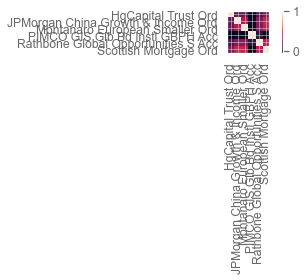

In [26]:
plotting.plot_covariance(sample_cov, plot_correlation=True)

## Return estimation

In [27]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(train_df)
mu

Name
HgCapital Trust Ord                    0.056634
JPMorgan China Growth & Income Ord     0.120015
Montanaro European Smaller Ord         0.074456
PIMCO GIS Glb Bd Instl GBPH Acc        0.020011
Rathbone Global Opportunities S Acc    0.059440
Scottish Mortgage Ord                  0.108811
Name: mkt, dtype: float64

## Manual Weights

In [28]:
if manual_weights:
    concatenated_df['Name'].unique()
    initial_weights = [0.2, 0.2, 0.2, 0.2, 0.1, 0.1]
    unique_fund_names = concatenated_df['Name'].unique()

    iterator = zip(unique_fund_names.tolist(), initial_weights)
    comb_weights = dict(iterator)
    comb_weights
    generate_performance_metrics(prices_pivot = train_df, benchmark = 'SPY', title = 'manual_weights', prefix_name = prefix_name, file_text = 'manual_weights', weights = comb_weights)



## Long/short min variance

In [29]:
from pypfopt import EfficientFrontier

In [30]:
S = risk_models.CovarianceShrinkage(train_df).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(0, 0.4))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('HgCapital Trust Ord', 0.20579),
             ('JPMorgan China Growth & Income Ord', 0.0),
             ('Montanaro European Smaller Ord', 0.14927),
             ('PIMCO GIS Glb Bd Instl GBPH Acc', 0.4),
             ('Rathbone Global Opportunities S Acc', 0.24494),
             ('Scottish Mortgage Ord', 0.0)])

In [31]:
ef.portfolio_performance(verbose=True);

Annual volatility: 6.0%


In [32]:
generate_performance_metrics(prices_pivot = train_df, benchmark = 'SPY', title = 'min_variance_train', prefix_name = prefix_name, file_text = 'min_variance_train', weights = weights)

In [33]:
generate_performance_metrics(prices_pivot = test_df, benchmark = 'SPY', title = 'min_variance_test', prefix_name = prefix_name, file_text = 'min_variance_test', weights = weights)

## Max Sharpe

In [34]:
S = risk_models.CovarianceShrinkage(train_df).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weights = ef.clean_weights()
weights

OrderedDict([('HgCapital Trust Ord', 0.18948),
             ('JPMorgan China Growth & Income Ord', 0.19706),
             ('Montanaro European Smaller Ord', 0.19159),
             ('PIMCO GIS Glb Bd Instl GBPH Acc', 0.03383),
             ('Rathbone Global Opportunities S Acc', 0.19009),
             ('Scottish Mortgage Ord', 0.19794)])

In [35]:
ef.portfolio_performance(verbose=True);

Expected annual return: 8.2%
Annual volatility: 11.8%
Sharpe Ratio: 0.53


In [36]:
generate_performance_metrics(prices_pivot = train_df, benchmark = 'SPY', title = 'max_sharpe_train', prefix_name = prefix_name, file_text = 'max_sharpe_train', weights = weights)

In [37]:
generate_performance_metrics(prices_pivot = test_df, benchmark = 'SPY', title = 'max_sharpe_test', prefix_name = prefix_name, file_text = 'max_sharpe_test', weights = weights)

## Maximise return for a given risk, with L2 regularisation

In [38]:
ef = EfficientFrontier(mu, S)
ef.efficient_risk(target_volatility=0.08)
weights = ef.clean_weights()
weights

OrderedDict([('HgCapital Trust Ord', 0.13725),
             ('JPMorgan China Growth & Income Ord', 0.12749),
             ('Montanaro European Smaller Ord', 0.13453),
             ('PIMCO GIS Glb Bd Instl GBPH Acc', 0.33794),
             ('Rathbone Global Opportunities S Acc', 0.13646),
             ('Scottish Mortgage Ord', 0.12634)])

In [39]:
ef.portfolio_performance(verbose=True)

Expected annual return: 6.2%
Annual volatility: 8.0%
Sharpe Ratio: 0.52


(0.06171045716371297, 0.08000000017849525, 0.5213807133831123)

In [40]:
generate_performance_metrics(prices_pivot = train_df, benchmark = 'SPY', title = 'max_return_given_risk_train', prefix_name = prefix_name, file_text = 'max_return_given_risk_train', weights = weights)

In [41]:
generate_performance_metrics(prices_pivot = test_df, benchmark = 'SPY', title = 'max_return_given_risk_test', prefix_name = prefix_name, file_text = 'max_return_given_risk_test', weights = weights)

## L2 Regularisation

In [42]:
from pypfopt import objective_functions

# You must always create a new efficient frontier object
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamme is the tuning parameter
ef.efficient_risk(0.15)
weights = ef.clean_weights()
weights

OrderedDict([('HgCapital Trust Ord', 0.09364),
             ('JPMorgan China Growth & Income Ord', 0.34004),
             ('Montanaro European Smaller Ord', 0.16269),
             ('PIMCO GIS Glb Bd Instl GBPH Acc', 0.0),
             ('Rathbone Global Opportunities S Acc', 0.10244),
             ('Scottish Mortgage Ord', 0.30119)])

In [43]:
ef.portfolio_performance(verbose=True)

Expected annual return: 9.7%
Annual volatility: 15.0%
Sharpe Ratio: 0.51


(0.0970877427627223, 0.1499999998881319, 0.5139182854680892)

In [44]:
generate_performance_metrics(prices_pivot = train_df, benchmark = 'SPY', title = 'max_return_l2_reg_train', prefix_name = prefix_name, file_text = 'max_return_L2_reg_train', weights = weights)

In [45]:
generate_performance_metrics(prices_pivot = test_df, benchmark = 'SPY', title = 'max_return_l2_reg_test', prefix_name = prefix_name, file_text = 'max_return_L2_reg_test', weights = weights)

## Efficient semi-variance optimization

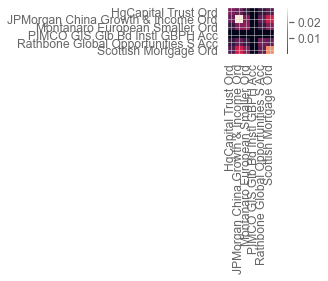

In [46]:
semicov = risk_models.semicovariance(train_df, benchmark=0)
plotting.plot_covariance(semicov);

In [47]:
ef = EfficientFrontier(mu, semicov)
ef.efficient_return(0.06)
weights = ef.clean_weights()
weights

OrderedDict([('HgCapital Trust Ord', 0.04533),
             ('JPMorgan China Growth & Income Ord', 0.14668),
             ('Montanaro European Smaller Ord', 0.13832),
             ('PIMCO GIS Glb Bd Instl GBPH Acc', 0.46441),
             ('Rathbone Global Opportunities S Acc', 0.0425),
             ('Scottish Mortgage Ord', 0.16276)])

In [48]:
ef.portfolio_performance(verbose=True);

Expected annual return: 6.0%
Annual volatility: 6.1%
Sharpe Ratio: 0.66


In [49]:
generate_performance_metrics(prices_pivot = train_df, benchmark = 'SPY', title = 'semi_var_opt_train', prefix_name = prefix_name, file_text = 'semi_var_opt_train', weights = weights)

In [50]:
generate_performance_metrics(prices_pivot = test_df, benchmark = 'SPY', title = 'semi_var_opt_train_test', prefix_name = prefix_name, file_text = 'semi_var_opt_train_test', weights = weights)

## Efficient CVaR optimization

In [51]:
returns = expected_returns.returns_from_prices(train_df).dropna()
returns.head()

Name,HgCapital Trust Ord,JPMorgan China Growth & Income Ord,Montanaro European Smaller Ord,PIMCO GIS Glb Bd Instl GBPH Acc,Rathbone Global Opportunities S Acc,Scottish Mortgage Ord
Date,,,,,,
2018-01-09,0.002793,0.000000,0.003058,-0.001894,0.004621,0.008148
2018-01-10,-0.008357,0.025000,0.012195,-0.000474,-0.000883,-0.004679
2018-01-11,0.002809,-0.003049,0.000000,0.000000,0.000883,0.000427
2018-01-12,0.000000,0.003058,0.000000,0.000475,-0.004088,-0.000427
2018-01-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weight_arr = ef.weights
ef.portfolio_performance(verbose=True);

Expected annual return: 8.2%
Annual volatility: 11.8%
Sharpe Ratio: 0.53


## Plotting - Unconstrained

In [53]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 3.5%
Annual volatility: 3.8%
Sharpe Ratio: 0.40


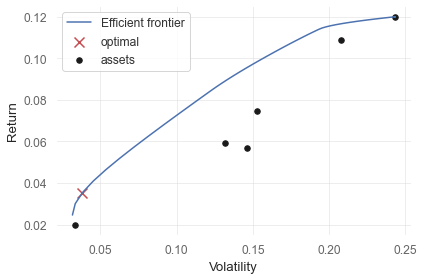

In [54]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)